<a href="https://colab.research.google.com/github/shoaibsattar823/CS893-Object-Detection/blob/master/retinanet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
cd drive/My\ Drive/Advanced\ Computer\ Vision\ (\CS\ 893)\/Assignment2/modified

/content/drive/My Drive/Advanced Computer Vision (CS 893)/Assignment2/modified


Some preprocessing stuff

In [0]:
class_mapping = ['Car', 'Truck', 'Van', 'LongVehicle', 'Bus', 
                'Airliner', 'Propeller Aircraft', 'Trainer Aircraft', 'Chartered Aircraft',
                'Fighter Aircraft', 'Others', 'Stair Truck', 'Pushback Truck',
                'Helicopter', 'Boat']
class_mapping = dict(enumerate(class_mapping))

#### Cloning RetinaNet Implementation by Fizyr and Installing

In [5]:
!git clone https://github.com/fizyr/keras-retinanet
!pip install ./keras-retinanet/
!mv keras-retinanet/* .
!rm -r keras-retinanet
!python setup.py build_ext --inplace

Cloning into 'keras-retinanet'...
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 5711 (delta 0), reused 1 (delta 0), pack-reused 5705
Receiving objects: 100% (5711/5711), 13.37 MiB | 11.53 MiB/s, done.
Resolving deltas: 100% (3831/3831), done.
Processing ./keras-retinanet
  Created wheel for keras-retinanet: filename=keras_retinanet-0.5.1-cp36-cp36m-linux_x86_64.whl size=170118 sha256=140bdae8bd59ef079d9e38a6eeac0d2624b7068f5f3d4463ff983aa11d59ac18
  Stored in directory: /root/.cache/pip/wheels/93/34/b4/a6dbdd66209aa2ea9c0b1984e00eb10d48c1e09dc61a7013d5
  Created wheel for keras-resnet: filename=keras_resnet-0.1.0-py2.py3-none-any.whl size=13346 sha256=fb373c0849cd05a0bf72ea7252d7a4ce026d4b225805d59726b39f85b3adc70e
  Stored in directory: /root/.cache/pip/wheels/80/dd/ac/842235b63dddac12faa4b48ebe58b8944e8c2e57c2e38dddb6
Successfully built keras-retinanet keras-resnet
running build_ext
cytho

#### Defining the model and Compiling

In [6]:
from keras_retinanet import models
import keras
model = models.backbone('resnet50').retinanet(num_classes=15)

Using TensorFlow backend.


In [0]:
import keras_retinanet
model.compile(
    loss={
        'regression'    : keras_retinanet.losses.smooth_l1(),
        'classification': keras_retinanet.losses.focal()
    },
    optimizer=keras.optimizers.adam(lr=1e-5, clipnorm=0.001)
)

In [8]:
model.summary()

Model: "retinanet"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, None, None, 3 0                                            
__________________________________________________________________________________________________
padding_conv1 (ZeroPadding2D)   (None, None, None, 3 0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, None, None, 6 9408        padding_conv1[0][0]              
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, None, None, 6 256         conv1[0][0]                      
__________________________________________________________________________________________

#### Creating Train, Validation and Test Data Generators

In [0]:
from keras_retinanet.preprocessing import csv_generator
TrainGenerator = csv_generator.CSVGenerator('data/training.csv', 'data/classes.csv')
TestGenerator = csv_generator.CSVGenerator('data/test.csv', 'data/classes.csv')
ValidationGenerator = csv_generator.CSVGenerator('data/validation.csv', 'data/classes.csv')

#### Training the Network

In [11]:
history = model.fit_generator(TrainGenerator, epochs=10)

Epoch 1/10
  97/3233 [..............................] - ETA: 25:48 - loss: 20099.6430 - regression_loss: 103.3947 - classification_loss: 19996.2480

/content/drive/My Drive/Advanced Computer Vision (CS 893)/Assignment2/modified/keras_retinanet/preprocessing/generator.py:181: UserWarning: Image data/./images/2218.jpg with id 1892 (shape (768, 1024, 3)) contains the following invalid boxes: [[ -3. 177. 110. 306.]].
  annotations['bboxes'][invalid_indices, :]


1620/3233 [==============>...............] - ETA: 9:20 - loss: 1206.9019 - regression_loss: 8.7089 - classification_loss: 1198.1919

/content/drive/My Drive/Advanced Computer Vision (CS 893)/Assignment2/modified/keras_retinanet/preprocessing/generator.py:181: UserWarning: Image data/./images/0503.jpg with id 680 (shape (768, 1024, 3)) contains the following invalid boxes: [[ -1. 309.  19. 346.]].
  annotations['bboxes'][invalid_indices, :]


3233/3233 [==============================] - 1118s 346ms/step - loss: 606.1734 - regression_loss: 5.4067 - classification_loss: 600.7661
Epoch 2/10
3233/3233 [==============================] - 1107s 342ms/step - loss: 2.4458 - regression_loss: 1.8046 - classification_loss: 0.6412
Epoch 3/10
3233/3233 [==============================] - 1107s 342ms/step - loss: 2.1277 - regression_loss: 1.5559 - classification_loss: 0.5718
Epoch 4/10
3233/3233 [==============================] - 1107s 342ms/step - loss: 1.8951 - regression_loss: 1.3715 - classification_loss: 0.5236
Epoch 5/10
3233/3233 [==============================] - 1108s 343ms/step - loss: 1.7097 - regression_loss: 1.2298 - classification_loss: 0.4798
Epoch 6/10
3233/3233 [==============================] - 1107s 342ms/step - loss: 1.5747 - regression_loss: 1.1241 - classification_loss: 0.4506
Epoch 7/10
3233/3233 [==============================] - 1114s 344ms/step - loss: 1.4565 - regression_loss: 1.0330 - classification_loss: 0.4235

In [0]:
model.save('retinanet_model.h5')

#### Converting Trained Model to Inference Model

In [13]:
!retinanet-convert-model retinanet_model.h5 retinanet_model_i.h5

Using TensorFlow backend.
2020-05-15 15:08:33.681974: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
2020-05-15 15:08:35.126146: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2020-05-15 15:08:35.130670: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2020-05-15 15:08:35.130972: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1561] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla T4 computeCapability: 7.5
coreClock: 1.59GHz coreCount: 40 deviceMemorySize: 14.73GiB deviceMemoryBandwidth: 298.08GiB/s
2020-05-15 15:08:35.131003: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
2020-05-15 15:08:35.133448: I tensorflow/stream

#### Evaluation and Visualizations

In [15]:
import os
model_path = os.path.join('retinanet_model_i.h5')

# load retinanet model
model_ = models.load_model(model_path, backbone_name='resnet50')

tracking <tf.Variable 'Variable:0' shape=(9, 4) dtype=float32, numpy=
array([[-22.627417, -11.313708,  22.627417,  11.313708],
       [-28.50876 , -14.25438 ,  28.50876 ,  14.25438 ],
       [-35.918785, -17.959393,  35.918785,  17.959393],
       [-16.      , -16.      ,  16.      ,  16.      ],
       [-20.158737, -20.158737,  20.158737,  20.158737],
       [-25.398417, -25.398417,  25.398417,  25.398417],
       [-11.313708, -22.627417,  11.313708,  22.627417],
       [-14.25438 , -28.50876 ,  14.25438 ,  28.50876 ],
       [-17.959393, -35.918785,  17.959393,  35.918785]], dtype=float32)> anchors
tracking <tf.Variable 'Variable:0' shape=(9, 4) dtype=float32, numpy=
array([[-45.254833, -22.627417,  45.254833,  22.627417],
       [-57.01752 , -28.50876 ,  57.01752 ,  28.50876 ],
       [-71.83757 , -35.918785,  71.83757 ,  35.918785],
       [-32.      , -32.      ,  32.      ,  32.      ],
       [-40.317474, -40.317474,  40.317474,  40.317474],
       [-50.796833, -50.796833,  50.7

/usr/local/lib/python3.6/dist-packages/keras/engine/saving.py:341: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


In [16]:
from keras_retinanet.utils.eval import evaluate
evaluate(TestGenerator, model_)

Running network: 100% (748 of 748) |#####| Elapsed Time: 0:02:17 Time:  0:02:17
Parsing annotations: 100% (748 of 748) |#| Elapsed Time: 0:00:00 Time:  0:00:00


({0: (0.5422049842628844, 3679.0),
  1: (0.19670069061882725, 446.0),
  2: (0.2105418856211708, 874.0),
  3: (0.21482930690947633, 222.0),
  4: (0.29504516327840236, 367.0),
  5: (0.7898387496352043, 161.0),
  6: (0.29807669150656146, 25.0),
  7: (0.13317635111282525, 49.0),
  8: (0.29313286219248047, 103.0),
  9: (0.0751192799826502, 8.0),
  10: (0.007786604452360962, 85.0),
  11: (0.012701152658755321, 83.0),
  12: (0.003059588501555301, 55.0),
  13: (0.011755344782448472, 9.0),
  14: (0.5271504414027698, 1820.0)},
 0.12016612514455051)

In [0]:
# show images inline
%matplotlib inline

from keras_retinanet.utils.image import read_image_bgr, preprocess_image, resize_image
from keras_retinanet.utils.visualization import draw_box, draw_caption
from keras_retinanet.utils.colors import label_color

import matplotlib.pyplot as plt
import cv2
import numpy as np
import time

In [0]:
labels_to_names=class_mapping

processing time:  0.16990113258361816


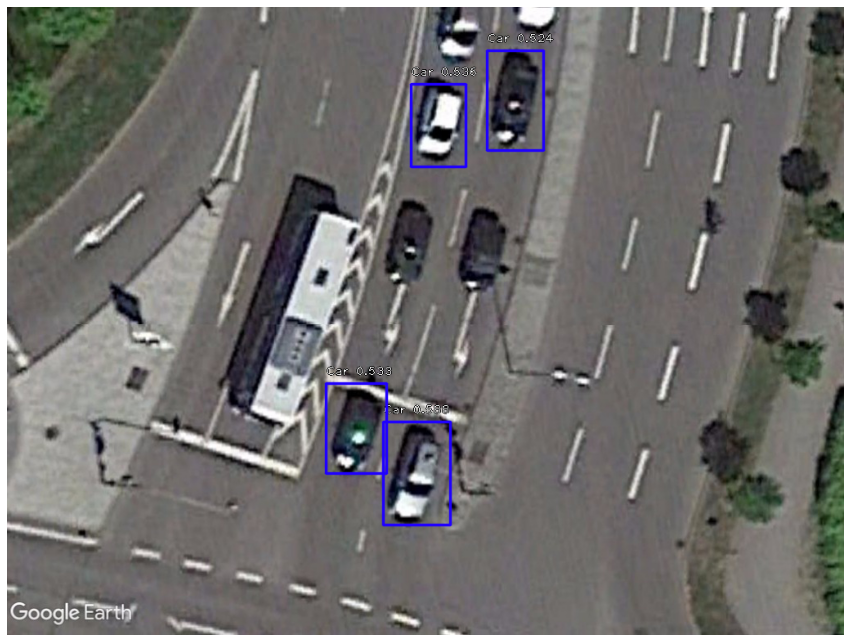

In [32]:
# load image
image = read_image_bgr('data/images/2000.jpg')

# copy to draw on
draw = image.copy()
draw = cv2.cvtColor(draw, cv2.COLOR_BGR2RGB)

# preprocess image for network
image = preprocess_image(image)
image, scale = resize_image(image)

# process image
start = time.time()
boxes, scores, labels = model_.predict_on_batch(np.expand_dims(image, axis=0))
print("processing time: ", time.time() - start)

# correct for image scale
boxes /= scale

# visualize detections
for box, score, label in zip(boxes[0], scores[0], labels[0]):
    # scores are sorted so we can break
    if score < 0.5:
        break
        
    color = label_color(label)
    
    b = box.astype(int)
    draw_box(draw, b, color=color)
    
    caption = "{} {:.3f}".format(labels_to_names[label], score)
    draw_caption(draw, b, caption)
    
plt.figure(figsize=(15, 15))
plt.axis('off')
plt.imshow(draw)
plt.show()